In [5]:
import matplotlib.pyplot as plt
from sympy import solve
from sympy.abc import x

In [13]:
k = 5
lambd = 1 / 9
mu = 1 / 7

psy = lambd / (k * mu)

profit = 50
expenses = 170
work_time = 9

r = .44167585492114

print(lambd / mu)
print(sum([r ** i for i in range(1, k + 1)]))

0.7777777777777778
0.7777778060979013


In [14]:
def get_p0(_r, _k):
    return (1 - _r) / _k

def get_pq(_r, _k, _q):
    return (1 - _r ** (_q + 1)) / _k

def get_pkn(_r, _psy, _n):
    return _psy * (1 - _r) * (_r ** _n)

In [15]:
p0 = get_p0(r, k)
print('p0 =', p0)

# а) среднее время ожидания в очереди
temp1 = p0 / (1 - r)
temp2 = (k * (k - 1)) / 2

numerator = r ** 2 * (k * r ** (k - 1) * (1 - r) - (1 - r ** k))
denominator = (1 - r) ** 2
temp3 = numerator / denominator

temp4 = p0 * (1 - r ** k) / (1 - r)
temp5 = (r ** 2) / ((1 - r) ** 2)

b_ = temp1 * (temp2 + temp3) + temp4 * temp5
print('b_ =', b_)

w_ = b_ / lambd
print('Среднее время ожидания в очереди:', w_)

# б) вероятность того, что аттракцион простаивает
p_p = p0 + sum([get_pq(r, k, q) for q in range(1, k)])
print('Вероятность того, что аттракцион простаивает:', p_p)

# в) среднее число человек, ожидающих в очереди 
print('Среднее число человек, ожидающих в очереди:', b_)

# г) вероятность ожидания в очереди 
p_wait_q = sum([get_pkn(r, psy, n) for n in range(500)])
print('Вероятность ожидания в очереди:', p_wait_q)

# д) долю времени, в течение которого аттракцион используется 
p_w = 1 - p_p
print('Долю времени, в течение которого аттракцион используется:', p_w)

# е) средние значения выручки и прибыли от использования аттракциона
revenue = profit * k * work_time * p_w * (60 / (1 / mu)) 
print('Среднее значение выручки от использования аттракциона:', revenue)

earnings = expenses * work_time * p_w * (60 / (1 / mu))
print('Среднее значение прибыли от использования аттракциона:', revenue - earnings)

p0 = 0.11166482901577202
b_ = 2.0132964449695603
Среднее время ожидания в очереди: 18.119668004726044
Вероятность того, что аттракцион простаивает: 0.8444444387804197
Среднее число человек, ожидающих в очереди: 2.0132964449695603
Вероятность ожидания в очереди: 0.15555555555555559
Долю времени, в течение которого аттракцион используется: 0.15555556121958025
Среднее значение выручки от использования аттракциона: 3000.0001092347616
Среднее значение прибыли от использования аттракциона: 960.0000349551235


In [17]:
# Определить, как изменятся средняя прибыль и среднее время ожидания 
# в очереди при различных значениях вместимости аттракциона – от 3 до 10 человек
capacity = list(range(3, 11))
profits = []
w_list = []

for c in capacity:
    p0 = get_p0(r, c)

    temp1 = p0 / (1 - r)
    temp2 = (c * (c - 1)) / 2

    numerator = r ** 2 * (c * r ** (c - 1) * (1 - r) - (1 - r ** c))
    denominator = (1 - r) ** 2
    temp3 = numerator / denominator

    temp4 = p0 * (1 - r ** c) / (1 - r)
    temp5 = (r ** 2) / ((1 - r) ** 2)

    b_ = temp1 * (temp2 + temp3) + temp4 * temp5

    w_ = b_ / lambd
    w_list.append(w_)

    p_p = p0 + sum([get_pq(r, c, q) for q in range(1, c)])
    p_w = 1 - p_p

    revenue = profit * c * work_time * p_w * (60 / (1 / mu)) 
    earnings = expenses * work_time * p_w * (60 / (1 / mu))
    profits.append(revenue - earnings)
    
print(capacity)
print(profits)
print(w_list)

[3, 4, 5, 6, 7, 8, 9, 10]
[-371.78458158481953, 440.27533737995145, 960.0000349551235, 1312.4082755295708, 1564.0876764301877, 1751.9488220747091, 1897.363803520958, 2013.2800859025115]
[9.613438081872806, 13.770940789252357, 18.119668004726044, 22.55285446829408, 27.0233445424702, 31.510310720753264, 36.00455399640355, 40.50201139025485]


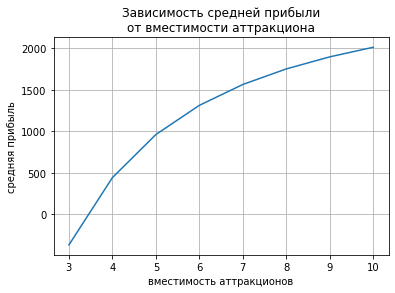

In [10]:
plt.plot(capacity, profits)
plt.title('Зависимость средней прибыли\nот вместимости аттракциона')
plt.xlabel('вместимость аттракционов')
plt.ylabel('средняя прибыль')
plt.grid()
plt.show()

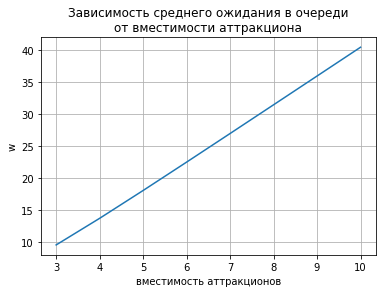

In [12]:
plt.plot(capacity, w_list)
plt.title('Зависимость среднего ожидания в очереди\nот вместимости аттракциона')
plt.xlabel('вместимость аттракционов')
plt.ylabel('w')
plt.grid()
plt.show()